# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

# Data File

In [2]:
apo_file   = 'data/apo_pka_convergence_s11_to_65.dat'
holo_file  = 'data/holo_pka_convergence_s21_to_42.dat'

# Collect Data

In [3]:
def data_collect(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            if '#' not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                dat_list = [float(dat) for dat in split_line]
                data.append(dat_list)
    return data

In [4]:
apo_data    = data_collect(apo_file)
holo_data  = data_collect(holo_file)

In [5]:
data_list = [apo_data, holo_data]
name_list = ['Apo', 'Holo']

# Plot Data Settings

## Colors

In [6]:
C1 = ('#FF0000') # Red
C2 = ('#FF8000') # Orange
C2 = ('#FFFF00') # Yellow
C3 = ('#00FF00') # Green
C4 = ('#A100FF') # Purple 
C5 = ('#FF00DE') # Pink 
C6 = ('#00CFFF') # Cyan
C7 = ('#3000FF') # Blue
black = ('Black')
colors1 = [C1, C2, C3, C4, C5]

## Global Settings

In [7]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [8]:
ink_x = 1.4 # 1.4
ink_y = 1.4 # 1.4

ink_markersize  = 2
ink_linewidth = 0.5

# Make Plots

In [9]:
legend = ['D4', 'D34', 'H161', 'D214', 'D303']

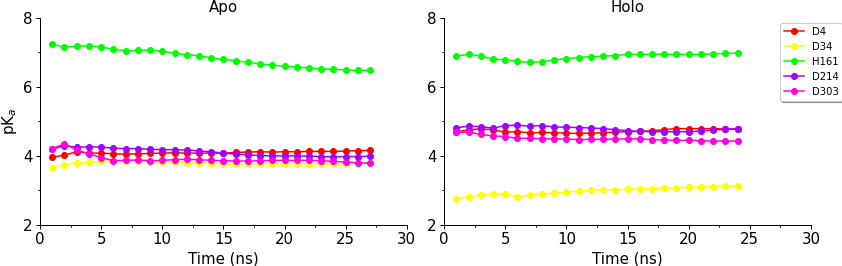

In [10]:
# Fold Cell
plt.close('all')

figcols = 2
figrows = 1

fig, axes = plt.subplots(nrows=figrows, ncols=figcols, figsize=(12, 4))
axes = axes.flatten()

for index in range(figcols*figrows):
    #Data
    for n in range(1, len(data_list[index][0])):
        line, = axes[index].plot([x[0] for x in data_list[index]],[y[n] for y in data_list[index]], 'o-', color=colors1[n-1], label=legend[n-1])
                

    #Plot Details
    axes[index].spines['top'].set_visible(False)
    axes[index].spines['right'].set_visible(False)

    axes[index].set_title('{}'.format(name_list[index]), fontsize=15)
    
    # Y-Axis
    if index == 0:
        axes[index].set_ylabel('pK$_a$', fontsize=15)
        #axes[index].legend(legend)
        
    axes[index].set_ylim(2, 8)
    axes[index].set_yticks([2, 4, 6, 8])
    axes[index].tick_params(axis='y', labelsize=15)
    axes[index].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[index].tick_params(labelleft=True)

    # X-Axis
    axes[index].set_xlabel('Time (ns)', fontsize=15)
    axes[index].set_xlim(0, 30)
    axes[index].set_xticks([0, 5, 10, 15, 20, 25, 30])
    axes[index].tick_params(axis='x', labelsize=15)
    axes[index].xaxis.set_minor_locator(AutoMinorLocator(2))
    axes[index].tick_params(labelbottom=True)

#box = fig.get_position()
#fig.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1)

plt.tight_layout()
plt.savefig('plots/SI_pKa_Convergence.png', dpi=360)
plt.show()